In [1]:
import pandas as pd
import glob
import numpy as np

# Get all CSV files ending with '_average.csv'
files = glob.glob('*_average.csv')

# Initialize a dictionary to store ranks for each method
method_ranks = {}

# Read each file and extract ranks
for file in files:
    df = pd.read_csv(file)
    for _, row in df.iterrows():
        method = row['Method']
        rank = row['Rank']
        if method not in method_ranks:
            method_ranks[method] = []
        method_ranks[method].append(rank)

# Compute mean and standard deviation of ranks
results = []
for method, ranks in method_ranks.items():
    mean_rank = np.mean(ranks)
    std_rank = np.std(ranks)
    results.append({
        'Method': method,
        'Mean Rank': mean_rank,
        'Std Dev Rank': std_rank
    })

# Create a DataFrame with the results
result_df = pd.DataFrame(results)

# Sort the DataFrame by Mean Rank
result_df = result_df.sort_values('Mean Rank')

# Display the results
print(result_df)


           Method  Mean Rank  Std Dev Rank
1      Regression        1.3      0.458258
2        Original        2.8      1.249000
0            TVAE        3.4      1.685230
3  GaussianCopula        3.6      0.663325
6    DecisionTree        4.8      1.886796
7      Stochastic        6.6      1.019804
5           CTGAN        6.7      0.781025
4       CopulaGAN        6.8      1.400000


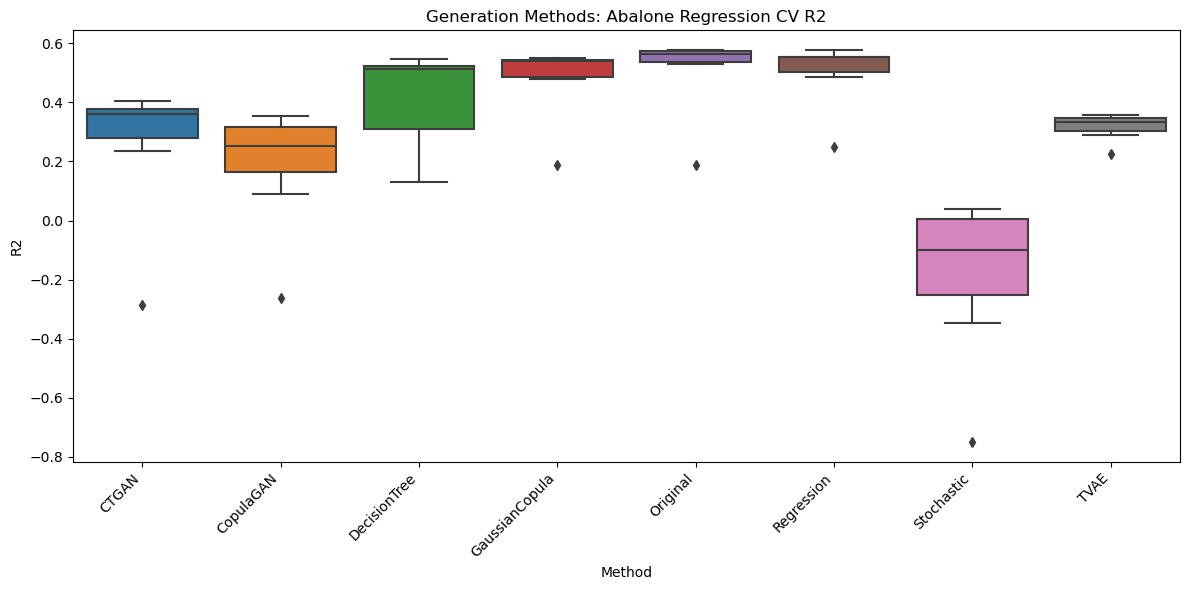

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_prefix = "abalone"  # Change this to any word you like
df =  pd.read_csv(f'{file_prefix}_compared.csv')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='R2', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Method')
plt.ylabel('R2')
plt.title('Generation Methods: Abalone Regression CV R2')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


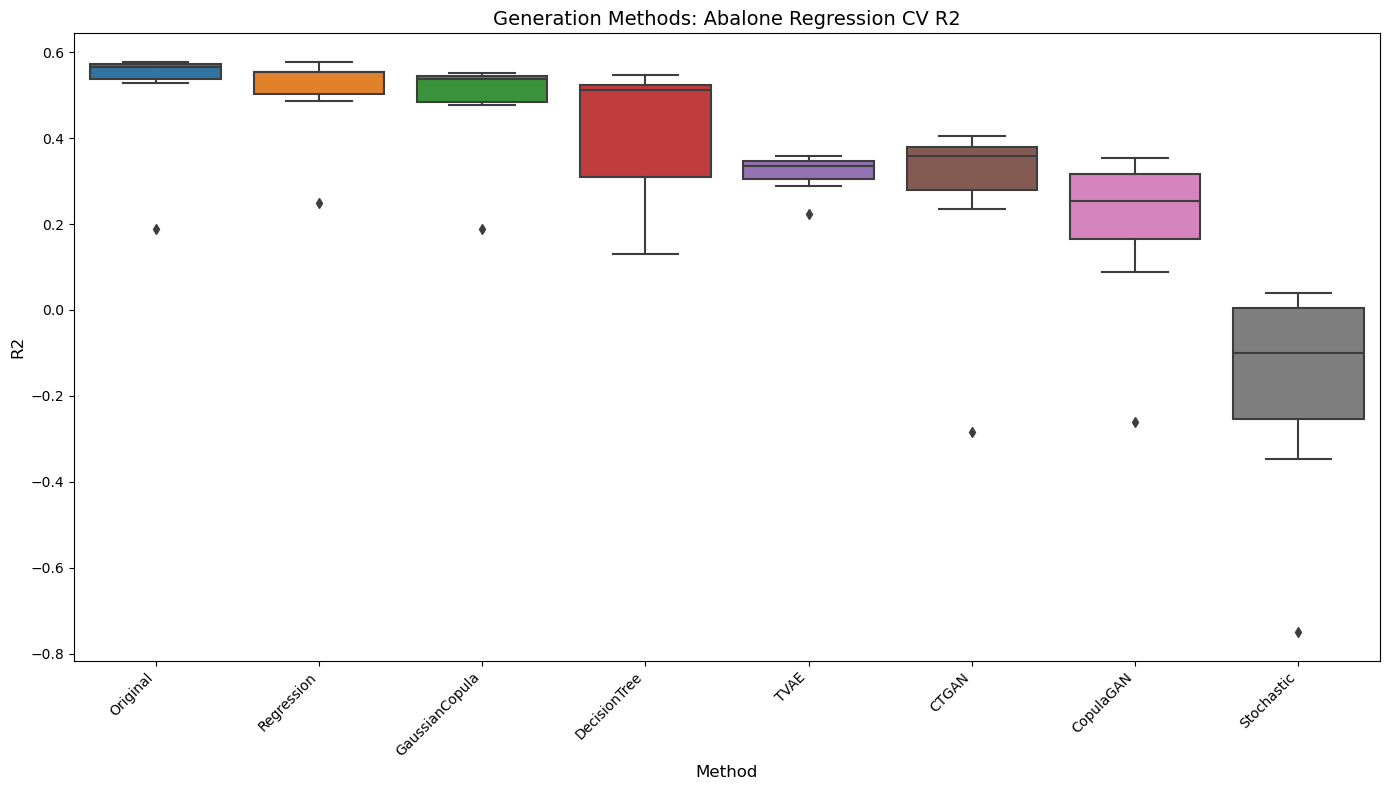

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_prefix = "abalone"  # Change this to any word you like
df = pd.read_csv(f'{file_prefix}_compared.csv')

# Calculate the mean R2 for each method
method_means = df.groupby('Method')['R2'].mean().sort_values(ascending=False)

# Create a custom order based on the mean R2 scores
custom_order = method_means.index

# Create the boxplot with custom order
plt.figure(figsize=(14, 8))
sns.boxplot(x='Method', y='R2', data=df, order=custom_order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Method', fontsize=12)
plt.ylabel('R2', fontsize=12)
plt.title('Generation Methods: Abalone Regression CV R2', fontsize=14)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()